# Retail Activity Dynamics in the EA7

This notebook analyses monthly retail activity across seven core euro-area economies
(AT, DE, ES, FI, FR, IT, NL) from 2010–2023.

We focus on:
- Long-run retail trends
- Business cycle fluctuations
- Major macroeconomic shocks
- Cross-country differences

Retail activity is proxied by the **Retail Trade Index (RTI)**,
augmented by inflation and sentiment indicators.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [3]:
df = pd.read_csv("../data/processed/macro_panel.csv")

df["month_dt"] = pd.to_datetime(df["month"])
df = df.sort_values(["country", "month_dt"])

In [4]:
df.groupby("country").size()

country
AT    168
DE    168
ES    168
FI    168
FR    168
IT    168
NL    168
dtype: int64

In [6]:
ea7_rti = df.groupby("month_dt", as_index=False)["rti_index"].mean()
ea7_rti.columns = ["month_dt", "ea7_rti"]

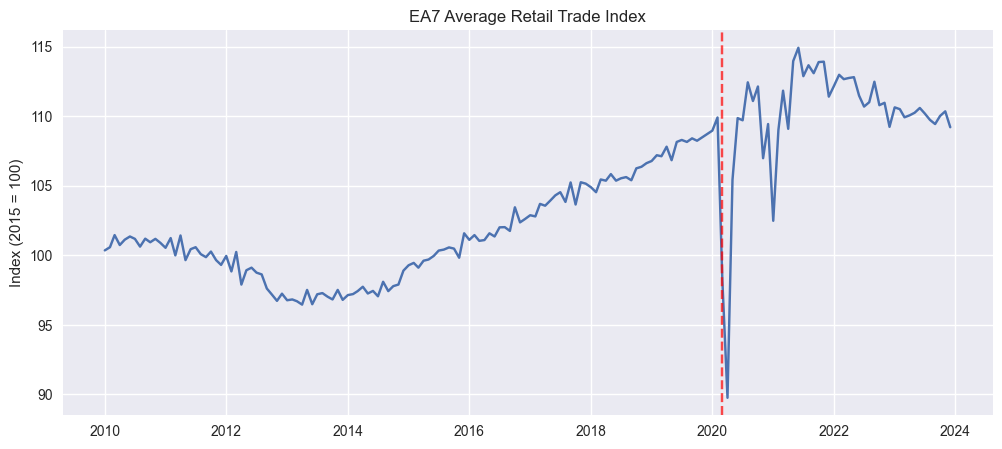

In [14]:
plt.figure(figsize=(12,5))
plt.plot(ea7_rti["month_dt"], ea7_rti["ea7_rti"])
plt.axvline(pd.Timestamp("2020-03-01"), color="red", linestyle="--", alpha=0.7) # type: ignore

plt.title("EA7 Average Retail Trade Index")
plt.ylabel("Index (2015 = 100)")
plt.xlabel("")
plt.show()

### EA7 Retail Activity: Key Patterns

Several distinct phases emerge:

1. **2010–2013**: Post–financial crisis stagnation
2. **2014–2019**: Gradual recovery and expansion
3. **2020**: Sharp COVID-19 shock
4. **2021–2022**: Strong rebound followed by inflationary pressure
5. **2023**: Normalisation with elevated prices

The COVID shock represents the largest negative retail disruption in the sample.

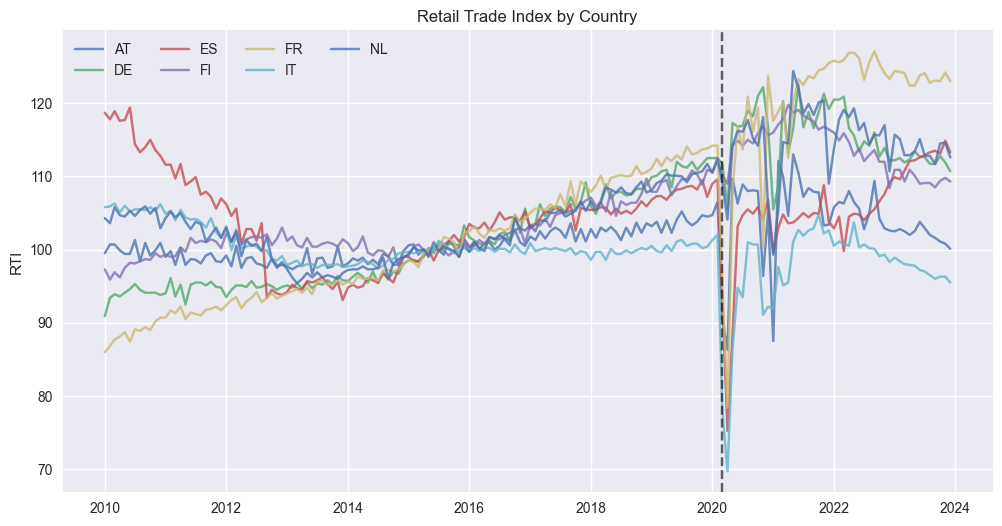

In [8]:
plt.figure(figsize=(12,6))

for c in df["country"].unique():
    subset = df[df["country"] == c]
    plt.plot(subset["month_dt"], subset["rti_index"], label=c, alpha=0.8)

plt.axvline(pd.Timestamp("2020-03-01"), color="black", linestyle="--", alpha=0.6)
plt.title("Retail Trade Index by Country")
plt.ylabel("RTI")
plt.legend(ncol=4)
plt.show()

### Cross-Country Retail Dynamics

Key observations:

- All countries experience a synchronized collapse in early 2020
- Southern economies (ES, IT) show larger volatility
- Core economies (DE, NL) exhibit faster recovery
- Retail cycles are highly synchronized, but amplitudes differ

This suggests **common macro shocks** with **heterogeneous national transmission**.

In [9]:
df["rti_growth"] = (
    df.groupby("country")["rti_index"]
      .pct_change() * 100
)

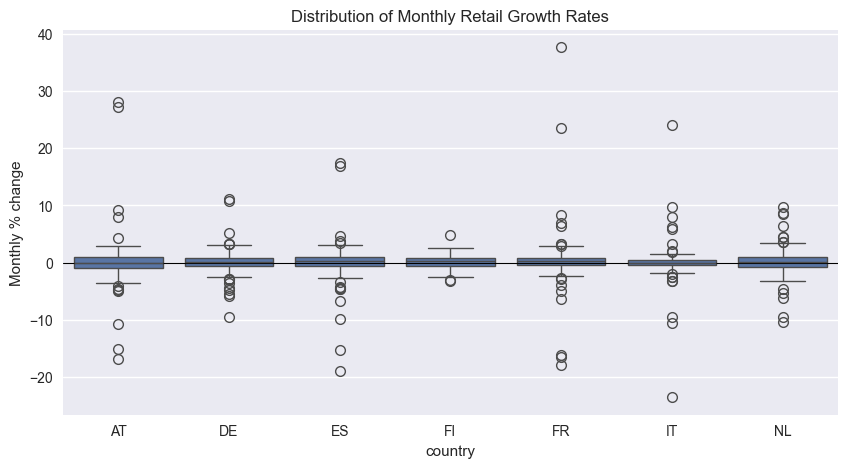

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="country", y="rti_growth")
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Distribution of Monthly Retail Growth Rates")
plt.ylabel("Monthly % change")
plt.show()

### Retail Volatility Across Countries

- Spain and Italy show the highest volatility
- Germany and the Netherlands are more stable
- Negative tail risk is particularly strong during crisis periods

This motivates later modelling of **shock sensitivity** and **resilience**.

In [11]:
covid_period = df[
    (df["month_dt"] >= "2020-03-01") &
    (df["month_dt"] <= "2020-06-01")
]

covid_impact = (
    covid_period.groupby("country")["rti_growth"]
    .mean()
    .sort_values()
)

covid_impact

country
IT   -0.122097
ES    0.000130
FI    0.649939
NL    0.962087
AT    1.087749
DE    1.120280
FR    2.921639
Name: rti_growth, dtype: float64

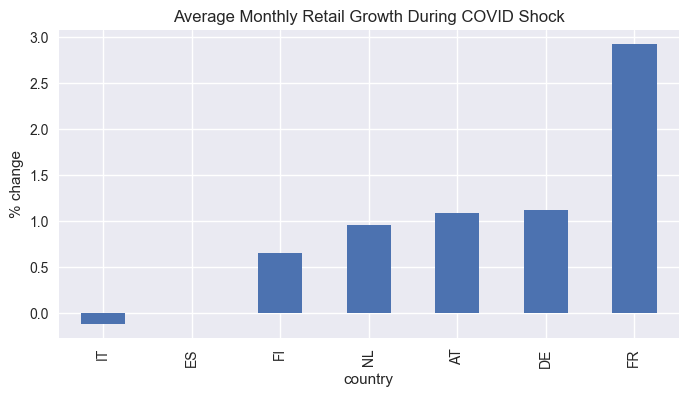

In [12]:
covid_impact.plot(kind="bar", figsize=(8,4))
plt.title("Average Monthly Retail Growth During COVID Shock")
plt.ylabel("% change")
plt.show()

### COVID-19 Retail Shock

- Retail contraction was universal
- Southern economies experienced deeper declines
- Heterogeneity suggests structural differences in consumption patterns

This confirms COVID-19 as a **structural break** in retail dynamics.

## Summary

This notebook established:

- Strong synchronization of retail cycles across EA7
- Large negative COVID shock with heterogeneous impact
- Persistent differences in volatility and recovery speed

Next, we examine how **inflation and sentiment interact with retail activity**.